In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
# 预处理
transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor(
), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 使用torchvision.datasets.ImageFolder读取数据集 指定train 和 test文件夹
trainset = torchvision.datasets.ImageFolder('data/train/', transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=1, shuffle=True, num_workers=0)

testset = torchvision.datasets.ImageFolder('data/test/', transform=transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=1, shuffle=True, num_workers=0)

classes = ('i2', 'i4', 'i5', 'io','ip', 'p5', 'p11', 'p23', 'p26', 'pl5',
           'pl30', 'pl40', 'pl50', 'pl60', 'pl80', 'pn', 'pne', 'po', 'w57')

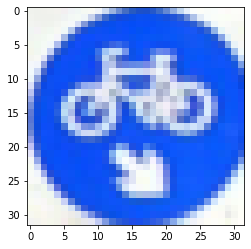

io


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


if __name__ == "__main__":
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 19)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [48]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [49]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.089
[1,  4000] loss: 1.094
[1,  6000] loss: 0.793
[1,  8000] loss: 0.562
[1, 10000] loss: 0.481
[1, 12000] loss: 0.455
[2,  2000] loss: 0.354
[2,  4000] loss: 0.413
[2,  6000] loss: 0.359
[2,  8000] loss: 0.482
[2, 10000] loss: 0.373
[2, 12000] loss: 0.278
[3,  2000] loss: 0.271
[3,  4000] loss: 0.261
[3,  6000] loss: 0.271
[3,  8000] loss: 0.296
[3, 10000] loss: 0.205
[3, 12000] loss: 0.303
[4,  2000] loss: 0.217
[4,  4000] loss: 0.294
[4,  6000] loss: 0.253
[4,  8000] loss: 0.204
[4, 10000] loss: 0.219
[4, 12000] loss: 0.240
[5,  2000] loss: 0.180
[5,  4000] loss: 0.150
[5,  6000] loss: 0.209
[5,  8000] loss: 0.201
[5, 10000] loss: 0.206
[5, 12000] loss: 0.137
[6,  2000] loss: 0.232
[6,  4000] loss: 0.164
[6,  6000] loss: 0.245
[6,  8000] loss: 0.202
[6, 10000] loss: 0.220
[6, 12000] loss: 0.218
[7,  2000] loss: 0.144
[7,  4000] loss: 0.192
[7,  6000] loss: 0.194
[7,  8000] loss: 0.208
[7, 10000] loss: 0.124
[7, 12000] loss: 0.184
[8,  2000] loss: 0.158
[8,  4000] 

In [50]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

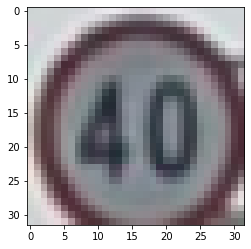

GroundTruth:   pl30


In [51]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [52]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [53]:
outputs = net(images)

In [55]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))

Predicted:   pl30


In [56]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 81 %


In [57]:
class_correct = list(0. for i in range(19))
class_total = list(0. for i in range(19))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(1):
            label = labels[i]
            class_correct[label] += c.item()
            class_total[label] += 1


for i in range(19):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of    i2 : 50 %
Accuracy of    i4 : 75 %
Accuracy of    i5 : 97 %
Accuracy of    io : 87 %
Accuracy of    ip : 97 %
Accuracy of    p5 : 87 %
Accuracy of   p11 : 65 %
Accuracy of   p23 : 73 %
Accuracy of   p26 : 89 %
Accuracy of   pl5 : 88 %
Accuracy of  pl30 : 80 %
Accuracy of  pl40 : 82 %
Accuracy of  pl50 : 73 %
Accuracy of  pl60 : 61 %
Accuracy of  pl80 : 84 %
Accuracy of    pn : 80 %
Accuracy of   pne : 90 %
Accuracy of    po : 68 %
Accuracy of   w57 : 86 %


In [5]:
#选用前面训练的最好的模型
model = torch.load('D:/vscode/python/Media_and_Cognition/exp/cifar_net.pth')
loss_func = nn.NLLLoss()
computeTestSetAccuracy(model, loss_func)
predict(model, 'D:/vscode/python/Media_and_Cognition/exp/data/0001.png')


NameError: name 'computeTestSetAccuracy' is not defined